Social Web Intelligence
=======================

*Analyzing and learning from users and their relationships*

<br/>
Yazan Boshmaf, UBC

<br/>
SFU/UBC Digital Salon's 2nd Digital Humanities Workshop

February 21, 2015 

Preliminaries
=============

About the presenter
===================

PhD candidate at UBC

Deisgn and analyze social bots as an academic

Build systems to fight the bad guys on the social web

*Feel free to contacts me at [boshmaf@ece.ubc.ca](mailto:boshmaf@ece.ubc.ca)*

About the slides
================

Created using Jupyter Notebook (was IPython)

Available to everyone

May have typos, errors, etc.

*Copy or contribute at [https://github.com/boshmaf/notebooks](https://github.com/boshmaf/notebooks)*

About the workshop
==================

SFU/UBC Digital Salon's Workshop Series

Organized by Siobhan McElduff ([siobhan.mcelduff@ubc.ca](mailto:siobhan.mcelduff@ubc.ca))

Theory and practice of network analysis & machine learning

*Applied to social networking problems with hands-on experience using Python*

Timeslot | Subject
--- |  ---  | ---
10:00 - 11:00 | Introduction
**11:00 - 11:15** | **Break I**
11:15 - 13:15 | Network analysis with Networkx
**13:15 - 13:30** | **Break II**
13:30 - 15:30 | Machine learning with SciKit-Learn
**15:30 - 15:45** | **Break III**
15:45 - 16:00 | Final remarks

Introduction
============

Social networks are everywhere
==============================

Model friendships, followships, professional relationships, etc.

Explicitly declared on the web using **online social networks** (OSNs)

- Facebook with **1.4B** montly active users [[1]]

- Twitter with **288M** montly active users [[2]]

- LinkedIn with **347M** registered users [[3]]

[1]: http://newsroom.fb.com/company-info/ "Facebook company info"
[2]: https://about.twitter.com/company "Twitter company info"
[3]: https://press.linkedin.com/about-linkedin "LinkedIn company info"


Facebook's geo-mapped social graph
==================================

![alt text][fb_graph]

[fb_graph]: images/fb_graph.jpg "Geo-mapped Facebook graph"

OSNs are goldmines for researchers
==================================

From tens or hundreds of participants to millions

Unique opporunity to analyze behavior on a **global scale**

*Milgram's small-world expirement replicated with 721M users and 69B friendships [[1], [2]]*

[1]: http://www.uvm.edu/~pdodds/files/papers/others/1969/travers1969.pdf "An experimental study of the small world problem"
[2]: http://arxiv.org/pdf/1111.4570v3.pdf "Four degrees of seperation"

Six-degrees of separation
=========================

![alt text][six_degrees]

[six_degrees]: images/six_degrees.png "Six-degrees of separation"

Collecting social network data
==============================

A static network dataset includes a snapshop of its

- **Graph:** Users and their relationships

- **Attributes:** User profiles and contents

Ways to collect social network data, from easiest to harderst:

- Download **publicly available** datasets

- Use data-access APIs provided by networks

- Crawl and scrape data from networks "manually"

Data comes in different shapes & formats
========================================

Usually **structured**, with a schema (Pajek, TAB, etc.)

- Adjacency list for graphs ( `user1, user2` )

- Data matrix for attributes ( `male, 26, vancouver, canada, UBC, etc.` )

But sometimes **semi-structured**, without a schema (JSON, XML, etc.)

- Dictionary with attribute names and values ( `{"gender":"male", "age":26}` )

- Marked up attributes with attribute tags and values

Stanford large network dataset collection (SNAP)
================================================

Public datasets for social, communication, citation, collaboration, road, and geo-location networks

Go to SNAP website [http://snap.stanford.edu/data/index.html](http://snap.stanford.edu/data/index.html)

Download Arxiv General Relativity ( `ca-GrQc` ) collaboration network

- Direct link is [http://snap.stanford.edu/data/ca-GrQc.html](http://snap.stanford.edu/data/ca-GrQc.html)

- Download compressed file `ca-GrQc.txt.gz`

- Uncompress the file into `~/dev/notebooks/swi/datasets/ca-GrQc.txt`

*Already available to you in the workshop's Github repo!*

Setting up dev environment
==========================

Installing Anaconda Python distribution
=======================================

Go to Continuum Anaconda webpage [http://continuum.io/downloads](http://continuum.io/downloads)

Download & install the propoer binary of Python 2.7 Graphical Installer

Update Anaconda and iPython, then install statsmodels

- Use graphical interface (Desktop shortcut)

- Or from command-line, type 
```
conda update conda
conda update jupyter
conda install statsmodels
```

*Anaconda comes with 224 packages, including Networkx and SciKit-Learn!*

Installing Git version control system
=====================================

Go to Git website [http://git-scm.com/downloads](http://git-scm.com/downloads)

Download and install the proper binary of Git 2.3.0

Clone the workshop's Git repo from Github using command-line

```
cd ~/
mkdir dev
cd dev
git clone https://github.com/boshmaf/notebooks.git
```

*Repository contains all workshop material*

Install PanDoc document convertor
=================================

Got to PanDoc website [http://johnmacfarlane.net/pandoc/installing.html](http://johnmacfarlane.net/pandoc/installing.html)

Download and install the proper binary of PanDoc 1.13.x

To view these slides from command-line, type

```
cd ~/dev/notebooks/swi
./start.sh
```

*This will open a new tab in the browser; use arrow keys to navigate*

You can now edit the slides!
============================

From command-line, type
```
cd ~/dev/notebooks/swi
jupyter notebook
```

*This will open a new tab in the browser; click on `swi.ipynb` to edit*

Break I
=======

Network analysis with Networkx
==============================

What is Networkx?
=================

Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Noticable features

- Data structures for graphs, digraphs, and multigraphs

- Many standard graph algorithms

- Generators for classic graphs, random graphs, and synthetic networks

- Nodes can be "anything" (e.g. text, images, XML records)

- Edges can hold arbitrary data (e.g. weights, time-series)

Go to Networkx website for more info [https://networkx.github.io/](https://networkx.github.io/)

Creating a graph
================

Graph $G=(V,E)$ is collection of nodes $V$ with identified pairs of nodes called edges $E$

In [1]:
# Import Networkx package
import networkx as nx

# Create empty undirected graph
G = nx.Graph()

*We will focus only on undirected graphs*

Adding nodes
============

In Python, `[o1, o2, etc.]` is used to group a **mutable list of objects**

Let's add a list of 3 nodes representing social network users Dave, Bob, and Alice

In [2]:
# Add three nodes
users = ["Dave","Bob","Alice"] 
G.add_nodes_from(users)

We can find number of nodes in the graph by computing its *order*

In [3]:
print "Number of nodes is:", G.order()

Number of nodes is: 3


Adding edges
============

In Python, `(o1, o2, etc.)` is used to group an **immutable tuple of objects**

Let's add a list of two friendship tuples between Bob and Dave, and Bob and Alice 

In [4]:
# Add edges between nodes
friendships = [("Bob","Dave"), ("Bob", "Alice")]
G.add_edges_from(friendships)

We can find number of edges in the graph by computing its *size*

In [5]:
print "Number of edges is:", G.size()

Number of edges is: 2


Creating a graph from a dataset
===============================

All we need to create a graph is an edge list

Let's create the Arxiv General Relativity ( `ca-GrQc` ) graph

First, we create an empty graph with no nodes

In [6]:
# Create an empty undirected graph
G = nx.Graph()

Then we open the dataset file and skip all headers

In [7]:
# Open dataset file for reading
dataset = open("datasets/ca-GrQc.txt", "rb")

# Skip the first 4 lines
for i in range(0,4):
    dataset.next()

Finally, we read the dataset line by line and add edges

In [8]:
# Create the graph, edge by edge
for line in dataset:
    line = line.strip() # Remove whitespace chars
    nodes = line.split("\t") # Split string by tab charater
    G.add_edge(nodes[0], nodes[1])
    
# Close dataset file
dataset.close()

It's always good to confirm the size and the order by assertion

In [9]:
assert G.order() == 5242
assert G.size() == 14496
print "Graph created successfully from dataset!"

Graph created successfully from dataset!


We can also use Networkx built-in `read_edgelist` method

In [10]:
# Open dataset file for reading
dataset = open("datasets/ca-GrQc.txt", "rb")

# Skip the first 4 lines
for i in range(0,4):
    dataset.next()
    
# Create graph from opened dataset file
G = nx.read_edgelist(dataset)

# Close dataset file
dataset.close()

Let's confirm the size and the order again

In [11]:
assert G.order() == 5242
assert G.size() == 14496
print "Graph dataset read successfully from file!"

Graph dataset read successfully from file!


Network analysis: Connected components
======================================

*Is the collaboration network connected?*

In [12]:
print "The graph is connected?", nx.is_connected(G)

The graph is connected? False


*How many connected components, or disjoint collaboration subgraph?*

In [13]:
print "Number of connected components is:", nx.number_connected_components(G)

Number of connected components is: 355


*What's the distribution of number of collaborators in each connected component?*

Let's plot the CDF, but we need to import new packages for this

In [23]:
# Enable plotting in the current Notebook
%matplotlib inline

# Import plotting interface
import matplotlib.pyplot as plt

# Import stats and numerical packages
import statsmodels.api as sm
import numpy as np

We then get the order of each connected component as a subgraph

In [15]:
# Get connected components as subgraphs
subgraphs = list(nx.connected_component_subgraphs(G))

# Find order of each subgraph
order_values = []
for subgraph in subgraphs:
    order_values.append(subgraph.order())

Finally, we plot the CDF of connected components order

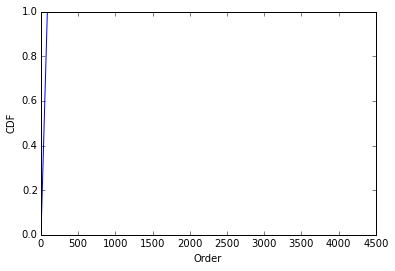

In [16]:
# Plot connected components order CDF
ecdf = sm.distributions.ECDF(order_values)
x = np.linspace(min(order_values), max(order_values))
y = ecdf(x)
plt.plot(x, y)
plt.xlabel("Order")
plt.ylabel("CDF")
plt.show()

As the plot is too skewed, we compute helpful summary stats

In [17]:
# Order summary stats
print "Min order:", np.min(order_values)
print "Max order:", np.max(order_values)
print "Mean order:", np.mean(order_values)
print "Median order:", np.percentile(order_values, 50)
print "90-percentile order:", np.percentile(order_values, 90)

Min order: 1
Max order: 4158
Mean order: 14.7661971831
Median order: 2.0
90-percentile order: 5.0


Based on this analysis, we focus on the largest connected compoent!

In [18]:
# User built-in max with custom value function
G = max(subgraphs, key=nx.Graph.order)

print "Number of nodes:", G.order()
print "Number of edges:", G.size()

Number of nodes: 4158
Number of edges: 13428


Network analysis: Connectivity
==============================

*What is the maximum number of in-between collaborators among any pair of researchers?*

We can find this by computing the **diameter** of the graph: The length of the longest shortest path between any pair of nodes

In [19]:
print "Graph diameter is:", nx.diameter(G)

Graph diameter is: 17


*How likely are the collaborators of a researcher to collaborate themselves, on average?*

We can find this by computing the **average clustering coefficient** $C(G)$ of the graph $G$:

$$ C(G) = \frac{1}{n} \sum_{v_i\in V} c(v_i) $$

Where $n$ is number of nodes and $c(v_i)$ is the *clustering coefficient* of node $v_i$, defined by

$$ c(v_i) = \frac{2T(v_i)}{\deg(v_i)(\deg(v_i)-1)} $$

Where $T(v_i)$ is the numer of *triangles* through node $v_i$ and $\deg(v_i)$ is the *degree* of $v_i$, which is number of edges incident to $v_i$

In [20]:
print "Average clustering coefficient is:", nx.average_clustering(G)

Average clustering coefficient is: 0.55687821617


*How dense is the collaboration, or how close it is to "everyone is collaborating with everyone else"?*

We can find this by computing the **density** $D(G)$ of the graph, defined by

$$ D(G) = \frac{2m}{n(n-1)} $$

where $m$ is number of edges

For a complete graph that is fully-connected, $m=n(n-1)/2$ so $D(G)=1$

In [21]:
print "Graph density:", nx.density(G)

Graph density: 0.00155373453425


Network analysis: Degree centrality
===================================

*Who are the most collaborative researchers?*

We find this by computing the degree **centrality** $c(v_i)$ of each node $v_i$: The fraction of nodes it is connected to, formally

$$ c(v_i) = \frac{\deg(v_i)}{n-1} $$

In [22]:
# Compute degree centrality of nodes
deg_centrality = nx.degree_centrality(G)

We then sort the nodes by their degree centrality and find top-5 nodes

In [23]:
# Impost useful operators for sorting
import operator

# Sort nodes by their degree centrality
top_nodes = sorted(deg_centrality.items(), key=operator.itemgetter(1), reverse=True)

# Print top-5 nodes
for i in range(0,5):
    print "Rank:", i+1, "with ID", top_nodes[i][0]

Rank: 1 with ID 21012
Rank: 2 with ID 21281
Rank: 3 with ID 22691
Rank: 4 with ID 12365
Rank: 5 with ID 6610


*What is the collaboration distribution among researchers?*

To find this, we plot the degree distribution of the graph

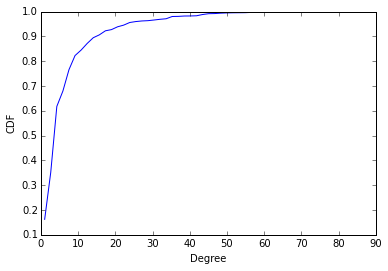

In [24]:
# Get degrees of all nodes
degree_values = G.degree(G.nodes()).values()

# Plot degree CDF
ecdf = sm.distributions.ECDF(degree_values)
x = np.linspace(min(degree_values), max(degree_values))
y = ecdf(x)
plt.plot(x, y)
plt.xlabel("Degree")
plt.ylabel("CDF")
plt.show()

Only 10% of researchers have at least 15 collaborators

- Concentrated distrubtion, power-law?

- We can compute helpful summary stats to elaborate

In [25]:
# Degree summary stats
print "Min degree:", np.min(degree_values)
print "Max degree:", np.max(degree_values)
print "Mean degree:", np.mean(degree_values)
print "Median degree:", np.percentile(degree_values, 50)
print "90-percentile degree:", np.percentile(degree_values, 90)

Min degree: 1
Max degree: 81
Mean degree: 6.45887445887
Median degree: 3.0
90-percentile degree: 15.0


Sampling a graph
================

If the graph is too large, we need to sample it

Ideally, the sampled graph should exhibit the same properties as the original

There are many ways to sample, most popular are [[1]]

- Breadth-first search (BFS) or depth-first search (DFS)

- Random walk and forest fire

[1]: http://cs.stanford.edu/people/jure/pubs/sampling-kdd06.pdf "Sampling from large graphs"

See animation of BFS sampling algorithm [https://www.cs.usfca.edu/~galles/visualization/BFS.html](https://www.cs.usfca.edu/~galles/visualization/BFS.html)

Okay, let's sample 30 nodes from the graph using BFS

In [26]:
# Import utility functions
import utils

# Sample a 30-node subgraph using BFS
H = utils.bfs_sample(G, size=30)

It is good to confirm the sampled graph is indeed smaller and connected

In [27]:
print "Number of nodes:", H.order()
print "Number of edges:", H.size()
print "Is connected?", nx.is_connected(H)

Number of nodes: 30
Number of edges: 29
Is connected? True


Visualizing a graph
===================

Let's visualize the graph sample instead of the whole graph 

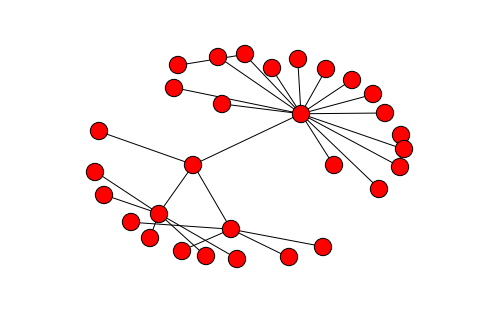

In [28]:
# Visualize the sampled graph
nx.draw(H)

# Show the plot
plt.show()

Break II
========

Machine learning with SciKit-Learn
==================================

What is SciKit-Learn?
=====================

Python package for machine learning

Noticable features

- Simple and efficient tools for data mining and data analysis

- Accessible to everybody, and reusable in various contexts

- Built on top of NumPy, SciPy, and MatPlotLib

Go to SciKit-Learn website for more info [http://scikit-learn.org/stable/index.html](http://scikit-learn.org/stable/index.html)

What is machine learning?
=========================

Using a set of data samples to **predict properties** of similar but **unseen before** data

Each data sample represents a vector of one of more numbers or categories called **features**

A collection of feature vectors is called a **dataset**

For example,

- User Bob has the following feature vector: $($1, "Bob", 24, "USA", "Male"$)$

- User Alice has the following feature vector: $($2, "Alice", 20, "Canada", "Female"$)$

- So 1st feature is ID, 2nd is name, 3rd is age, 4th is nationality, 5th is gender

*For a new user Dave with feature vector $($3, "Bob", 23, "Canada"$)$, what is Dave's gender?*

What is machine learning?
=========================

We will focus on **supervised** learning problems

- Feature vectors have at least one feature that we want to predict

- This feature is called the **target variable** (e.g., gender)

- Subset of feature vectors already have target values, called **training dataset**

- The rest we want to predict their target values, called **testing or new dataset**

- Goal is to predict "accurately with minimal errors" using a machine learning **algorithm**

If the target variable have discrete or categorical values (e.g., gender), it is called a **label** and the learning problem is called a **classification** problem

*We will tackle a classification problems using supervised machine learning*

![alt txt][supervised_ML]

[supervised_ML]: images/supervised_ML.png "Supervised machine learning"

Building a ground truth
=======================

*Let's predict gender from first names!*

Go to the US Social Security website [http://www.ssa.gov/oact/babynames/limits.html](http://www.ssa.gov/oact/babynames/limits.html)

Download the national popular baby names dataset, called `names.zip`

- Click on "National data"

- Uncompress the datasets a into datasets directory

*It's already available to you in the workshop repo!*

First, we need to get a list of file names

In [2]:
# Useful file pattern package
import glob

# Get a list of file names in dataset directory
file_names = glob.glob("datasets/names/*.txt")

Then, we open and combine their content

In [3]:
# Open files and merge data
dataset = {}
for file_name in file_names:
    file_data = open(file_name)
    for line in file_data:
        line = line.strip()
        data = line.split(",")
        
        name = data[0].lower()
        if name not in dataset:
            dataset[name] = [0,0] # [male_count, female_count]
        
        gender = 0 if data[1] == "M" else 1
        count = int(data[2])
        dataset[name][gender] += count

Let's print dataset summary and checkout the 100th data sample, for example

In [5]:
print "Number of names:", len(dataset)

name = dataset.keys()[100]
print "100th name is:", name

gender_count = dataset[name]
print "Its male count:", gender_count[0]
print "Its female count:", gender_count[1]

Number of names: 92600
100th name is: kinsler
Its male count: 151
Its female count: 18


The dataset has an issue: **Some names are unisex!**

*How big is the issue?*

In [6]:
# Compute ratio of unisex names in dataset
unisex_count = 0
for name in dataset:
    gender_count = dataset[name]
    if gender_count[0] != 0 and gender_count[1] != 0:
        unisex_count += 1
        
print "Number of unisex names:", unisex_count
print "Ratio is dataset: {0:.2f}%".format(100*unisex_count/float(len(dataset)))

Number of unisex names: 10090
Ratio is dataset: 10.90%


We can use gender count to label names as female or not

- Let $C_m(n_i)$ be count of males with name $n_i$

- Similarly, let $C_f(n_i)$ be the count of females with name $n_i$

Now, let a label $\ell(n_i)=1$ means the name $n_i$ **corresponds to a female**, as defined by

$$
\ell(n_i) = 
\begin{cases} 1 &\mbox{if } \displaystyle\frac{C_f(n_i)}{\left(C_f(n_i) + C_m(n_i)\right)} > 0.5, \\ 
0 & \mbox{Otherwise. }
\end{cases}
$$

Accordingly, Kinsler should be labelled as a male with target value of 0, let's do it

In [7]:
# Assign labels to names in dataset
female_count = 0
for name in dataset:
    gender_count = dataset[name]
    if gender_count[1] / float(sum(gender_count)) > 0.5:
        dataset[name] = 1
        female_count += 1
    else:
        dataset[name] = 0
        
print "Number of females:", female_count
print "Ratio is dataset: {0:.2f}%".format(100*female_count/float(len(dataset)))

Number of females: 58777
Ratio is dataset: 63.47%


Let's check back on Kinsler!

In [8]:
name = dataset.keys()[100]
print "100th name is:", name
print "Its gender is:", "Female" if int(dataset[name]) == 1 else "Male"

100th name is: kinsler
Its gender is: Male


*We haven't done machine learning yet; we just built a "low-noise" ground-truth!*

Feature extraction and engineering
==================================

*What are useful features of a name that predict the gender?*

For latin or western names, one can look at

- The last letter

- The last two letter

- Whether the last letter is a vowel

*Example: Philipp vs. Philippa*

Let's extract these features and build our labelled dataset

In [9]:
# Extract features from names
for name in dataset:
    name_features = {}
    name_features["last_letter"] = name[-1]
    name_features["last_two"] = name[-2:]
    name_features["last_is_vowel"] = 1 if name[-1] in "aeiouy" else 0
    name_features["label"] = dataset[name]
    dataset[name] = name_features

Let's look at how the 100th name features looks like

In [10]:
name = dataset.keys()[100]
print "Name is:", dataset.keys()[100]

features = dataset[name]
print "Feature 'last_letter' is:", features["last_letter"]
print "Feature 'last_two' is:", features["last_two"]
print "Feature 'last_is_vowel' is:", features["last_is_vowel"]
print "Label is:", features["label"]

Name is: kinsler
Feature 'last_letter' is: r
Feature 'last_two' is: er
Feature 'last_is_vowel' is: 0
Label is: 0


*We now have a labelled dataset in a feature-value or dictionary format*

Vectorizing the labelled dataset
================================

We need to convert the dataset from feature-value format to vectors

For categorical features, we can do **binary one-of-K** coding

- A binary feature is constructed for each of possible string values a feature can take

- So `last_letter` feature results in up to 26 features

*Example, `last_letter=a`, `last_letter=b`, etc.*

In [11]:
# Dictionary vectorizer from SciKit-Learn package
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer()
labelled_vectors = vectorizer.fit_transform(dataset.values()).toarray()

The vectorizer also preserves feature names

In [12]:
# Get feature names and label index
feature_names = vectorizer.get_feature_names()
label_index = feature_names.index("label")
feature_names.remove("label")

print "Number of features:", len(feature_names)

Number of features: 468


Finally, we split the labelled vectors into vectors and labels

In [14]:
# Split labelled vectors into labels and vectors
import numpy as np
labels = labelled_vectors[:,label_index]
vectors = np.delete(labelled_vectors, [label_index], axis=1)
print vectors

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


It's always good to validate we have all data by asserting

In [15]:
# Validate dimensions
assert vectors.shape[0] == len(dataset)
assert vectors.shape[1] == len(feature_names)
assert labels.shape[0] == vectors.shape[0]
print "Dataset vectorized successfully!"

Dataset vectorized successfully!


Training a classifier using Naive Bayes
=======================================

*First, what is Naive Bayes classifier?*

Applies Bayes' theorem with the "naive" assumption of **independence between every pair of features**.

Given a target variable $y$ and a dependent feature vector $(x_1,\dots,x_n)$ of $n$ features, Bayes' theorem states the following relationship:

$$
P(y~|~x_1,\dots,x_n) = \frac{P(y)P(x_1,\dots,x_n~|~y)}{P(x_1,\dots,x_n)}
$$

Using the naive independence assumption that

$$
P(x_i~|~y,x_1,\dots,x_{i-1},x_{i+1},\dots,x_n) = P(x_i~|~y)
$$

And the chaining rule

$$
P(x_1,\dots,x_n~|~y) = P(x_1~|~y)P(x_2,\dots,x_n~|~y)
$$

For all $i$, this relationship simplifies to

$$
P(y~|~x_1,\dots,x_n) = \frac{P(y)\prod_{i=1}^n P(x_i~|~y)}{P(x_1,\dots,x_n)}
$$

Since $P(x_1,\dots, x_n)$ is constant given the input, we can use the following classification rule

$$
P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y) \\ \Downarrow \\ \hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)
$$

We can use Maximum A Posteriori (MAP) estimation to estimate $P(y)$ and $P(x_i~|~y)$; the former is then the **relative frequency** of class y in the training set.

Different assumptions regarding the distribution of $P(x_i~|~y)$ lead to different classifiers

- We assume data is distributed according to multivariate Bernoulli distributions

- Meaing there may be multiple features but each one is assumed to be a binary-valued

The decision rule for **Bernoulli naive Bayes** is based on

$$
P(x_i \mid y) = P(i \mid y) x_i + (1 - P(i \mid y)) (1 - x_i)
$$

Alright, let's start the learning process. First, we need to shuffle the data to remove ordering bias

In [16]:
# Import shuffle method
from sklearn.utils import shuffle

# Shuffle the data
rand_state = np.random.RandomState(seed=0)
X, y = shuffle(vectors, labels, random_state=rand_state)

We now slpit the data into 80% training set and 20% testing set

In [17]:
# Split data
training_index = X.shape[0] * 0.8
X_train = X[:training_index]
y_train = y[:training_index]

X_test = X[training_index:]
y_test = y[training_index:]

Always confirm your split was correct

In [18]:
assert (X_train.shape[0] + X_test.shape[0]) == X.shape[0] 
assert (y_train.shape[0] + y_test.shape[0]) == y.shape[0]

assert X_train.shape[1] == X_test.shape[1]

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

print "Data split successfully!"

Data split successfully!


We are ready to train now using a Bernoulli Naive Bayes classifier

In [19]:
# Import the classifier
from sklearn.naive_bayes import BernoulliNB

# Train the classifier
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

print classifier

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


Testing the classifier
======================

*How accurate is the classifier?*

Let's test the trained classifier using the testing data

In [20]:
# Predict labels of unseen data
y_predicted = classifier.predict(X_test)

We then compute the **accuracy** of the classifier: The fraction of correct predictions.

In [21]:
# Import testing metrics
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predicted)
print "Classifier accuracy:", accuracy

Classifier accuracy: 0.800647948164


Let's compute the accuracy of the classification problem as a whole

- We compute the **confusion matrix**, which tells us true positives, true negatives, etc.

- We can visually plot it too

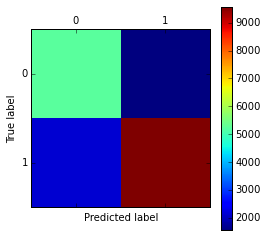

In [24]:

# Import testing metrics
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_predicted)

# Visualize the matrix
plt.matshow(conf_matrix)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

*How about if I have only a name?*

We extract features, vectorize, and then test!

In [29]:
# Import helper function from utils
import utils

# Get feature vector from name
name = "Christian"
vector = utils.get_vector(name, feature_names, X[0])

# Predict whether name is female
print "Classifier says", name, "is a", "female" if classifier.predict(vector) == 1 else "male"

Classifier says Christian is a male


*A better way to evaluate a classifier is by cross validation and ROC analysis*

Break III
=========

Final remarks
=============

We just scratched the surface!
==============================

Social web intelligence gets more technical with big data [[1]]

More interesting research has been a **collaboration** between 

- Computer scientists: Deal with big data problems

- Statisticians: Develop statistical inference models
 
- Social scientists: Ground the research, answer the "why?"

[1]: https://www.coursera.org/course/bigdata "Web intelligence and big data"

*Feel free to email me at [boshmaf@ece.ubc.ca](mailto:boshmaf@ece.ubc.ca)*

Questions, please?
==========